# Mushrooms- Individual

                                                                                   {'Author': 'Justin Tung', 
                                                                                    'Professor': 'Uhe',
                                                                                    'Class': 'IS445 (Data Visualization)',
                                                                                    'Semester': 'Fall 2023'
                                                                                    'Project': 'Final'}

Dataset is from Audobon Society Field Guide, licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given. 

It can be found here: https://archive.ics.uci.edu/dataset/73/mushroom 


In [3]:
# import every packagae under the sun

import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from pywaffle import Waffle
from matplotlib.patches import FancyBboxPatch
import squarify
import plotly.graph_objects as go
from webcolors import hex_to_rgb

In [4]:
with open('data/mushroom/agaricus-lepiota.names', 'r') as text:
    print(text.read())

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [5]:
df = pd.read_csv('data/mushroom/expanded.csv')
df = df.apply(lambda x: x.astype(str).str.lower())
df

,edible,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,edible,convex,smooth,white,bruises,almond,free,crowded,narrow,white,...,smooth,white,white,partial,white,one,pendant,purple,several,woods
1,edible,convex,smooth,white,bruises,almond,free,crowded,narrow,white,...,smooth,white,white,partial,white,one,pendant,brown,several,woods
2,edible,convex,smooth,white,bruises,almond,free,crowded,narrow,pink,...,smooth,white,white,partial,white,one,pendant,purple,several,woods
3,edible,convex,smooth,white,bruises,almond,free,crowded,narrow,pink,...,smooth,white,white,partial,white,one,pendant,brown,several,woods
4,edible,convex,smooth,white,bruises,almond,free,crowded,narrow,brown,...,smooth,white,white,partial,white,one,pendant,purple,several,woods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,edible,knobbed,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,brown,one,pendant,brown,clustered,leaves
8412,edible,knobbed,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,brown,one,pendant,orange,several,leaves
8413,edible,knobbed,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,brown,one,pendant,orange,clustered,leaves
8414,edible,knobbed,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves


In [6]:
sz = os.path.getsize(r'data/mushroom/expanded.csv')
shape = df.shape
print(f'The mushroom database is {sz} bytes, and has {shape[0]} rows and {shape[1]} columns.')

The mushroom database is 1265152 bytes, and has 8416 rows and 23 columns.



This data really interested me for several reasons. Firstly, the subject matter is interesting to me. I enjoy mushrooms both as an item of nutrition as well as an aesthetic item. There's something so fun about a little bobble head guy just living its life in the world. I found this personal affinity interesting, and was intriged by the idea of making graphs about mushrooms that incorporate the visual form of the mushroom itself.

Secondly, this dataset was interesting because there is no quantitative data in this set at all. While this raises interesting questions to be about the data collection process (e.g. how was 'chocolate' differentiated from 'brown'?), I was interested in what it looks like to work with this dataset. 

First up, check for NaNs

In [5]:
df.isna().sum()

edible                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

That's pretty incredible!

In [6]:
df.dtypes

edible                      object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises%3F                  object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

As previously mentioned, every data field is a string. While I could do some simple replacements, such as making 'edible': 0 and 'poisonous': 1, I don't really find this necessary. Nor is it helpful. It's not like if I assigned 'green': 2 and 'yellow': 4 that Yellow would be twice as much as green in any meaningful way.

My first idea was to generate a whole bunch of histograms that show the frequencies of different discreet qualities for each column. One of the fun things you can't really do with floating point quantitative data!

C:\Users\jct3368\AppData\Local\Temp\ipykernel_64568\1681794661.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


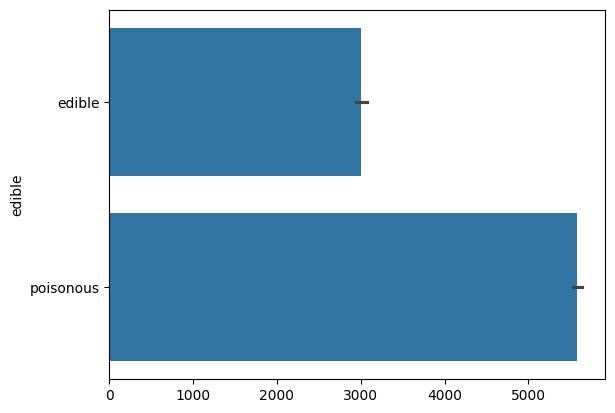

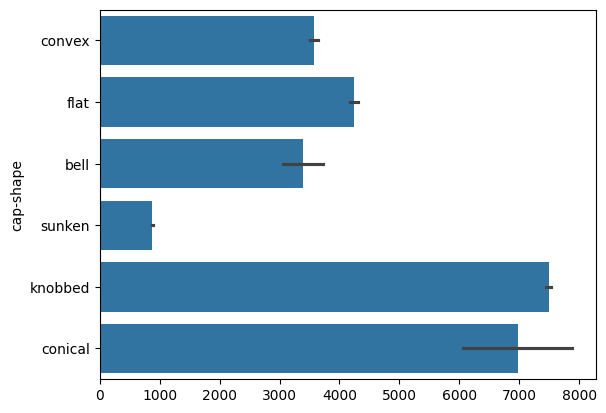

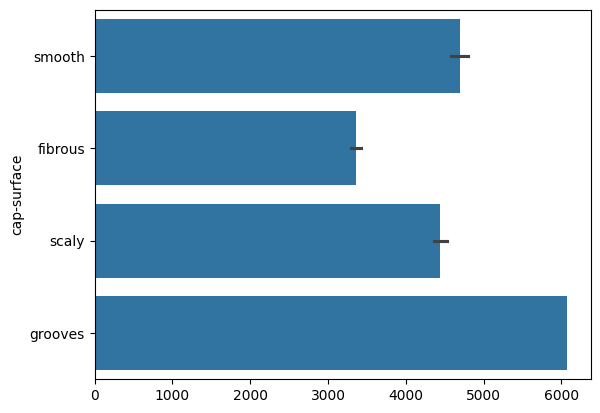

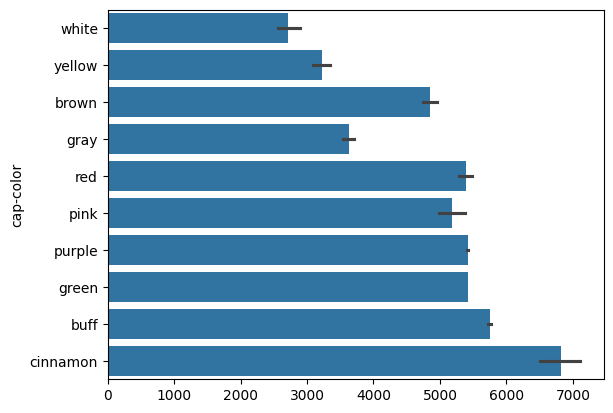

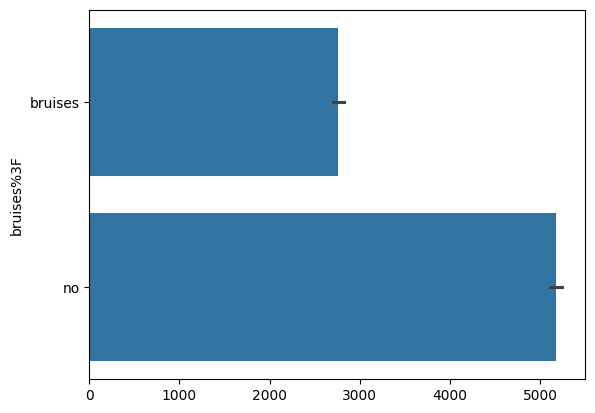

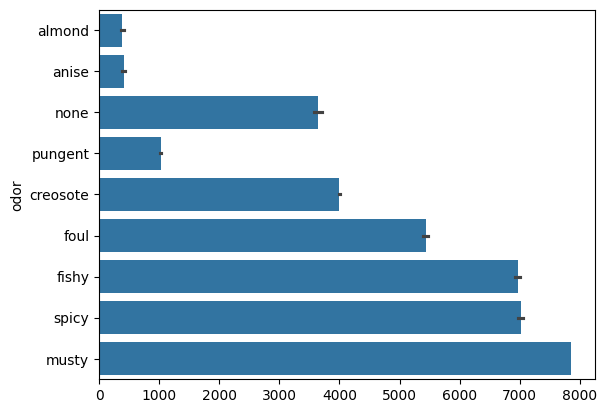

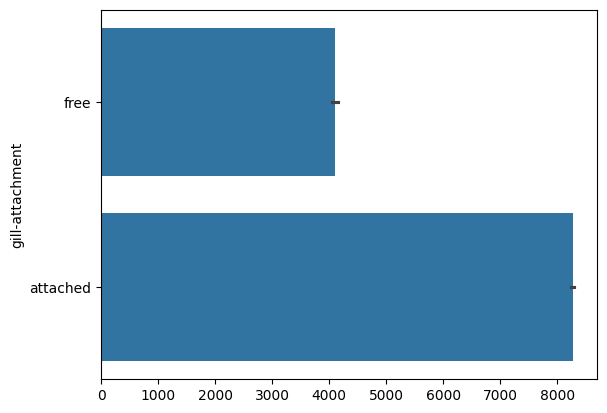

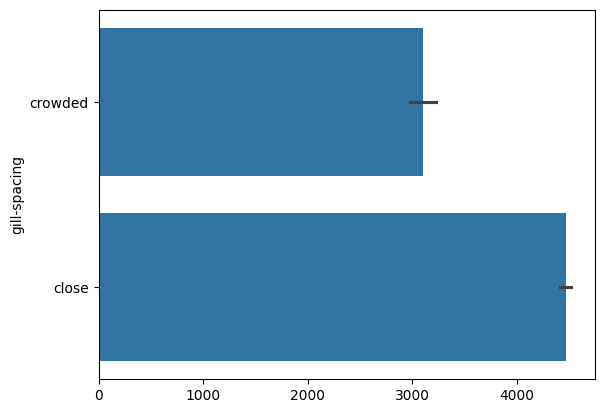

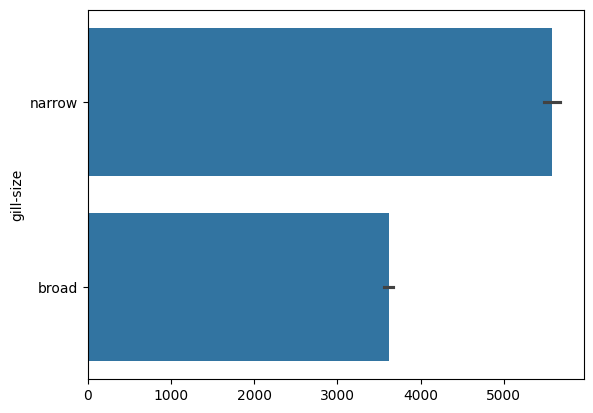

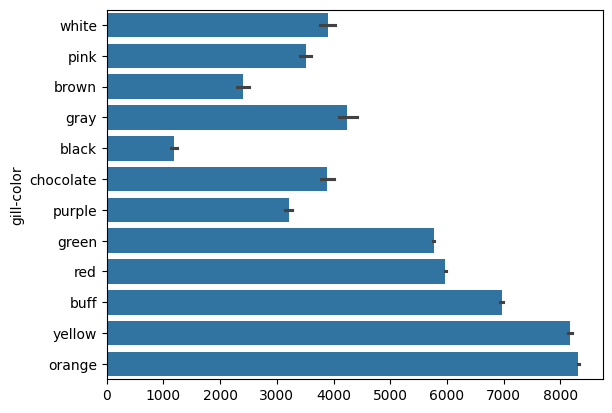

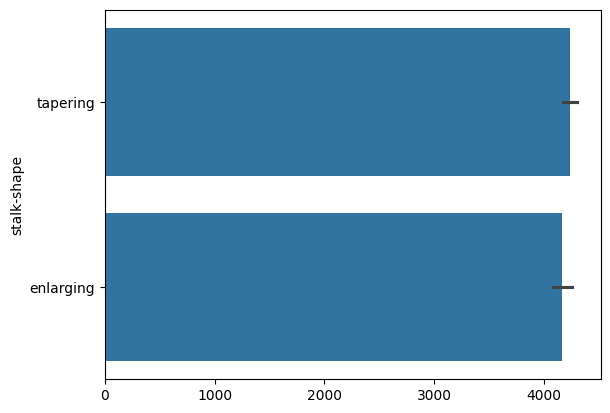

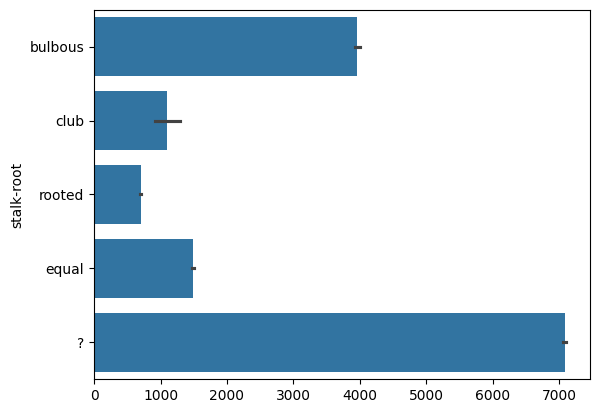

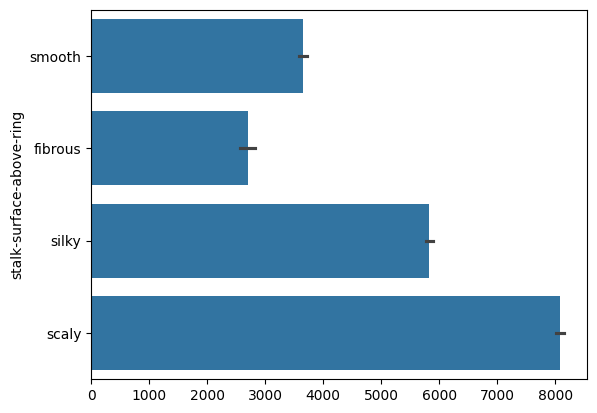

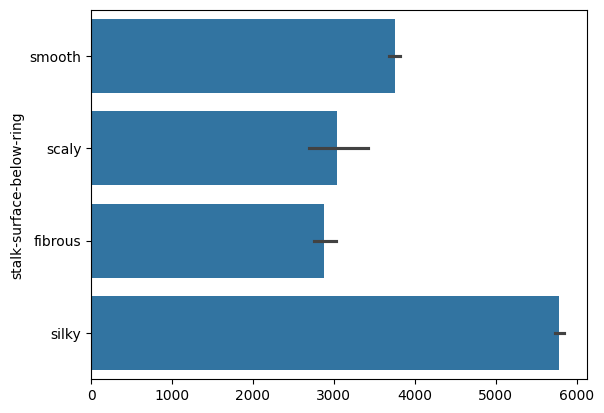

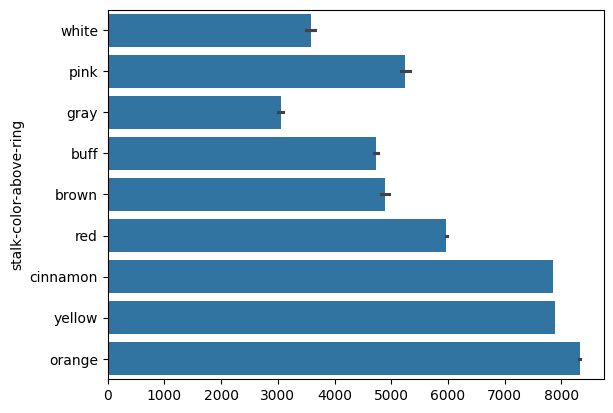

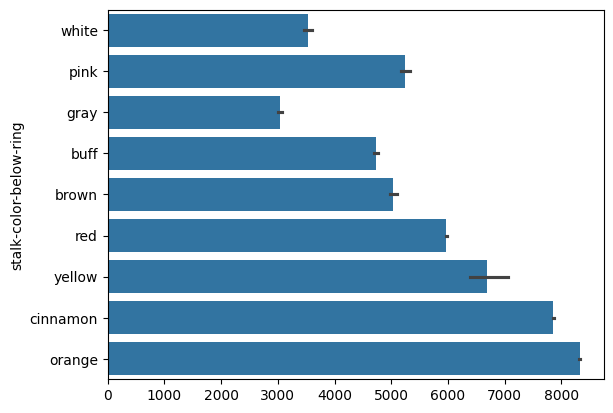

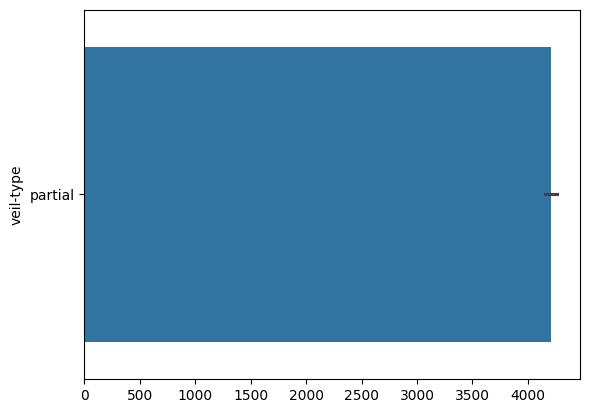

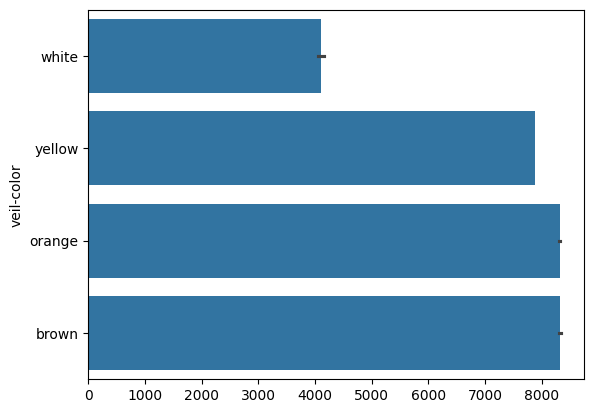

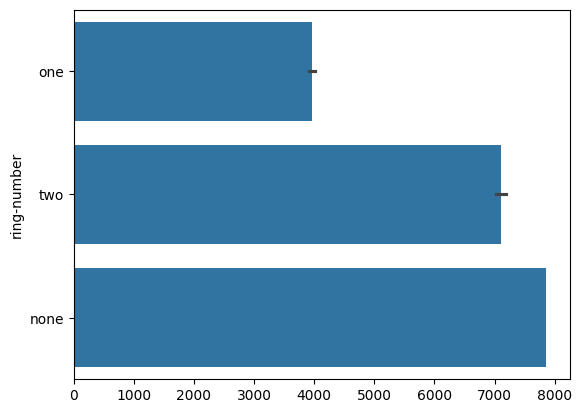

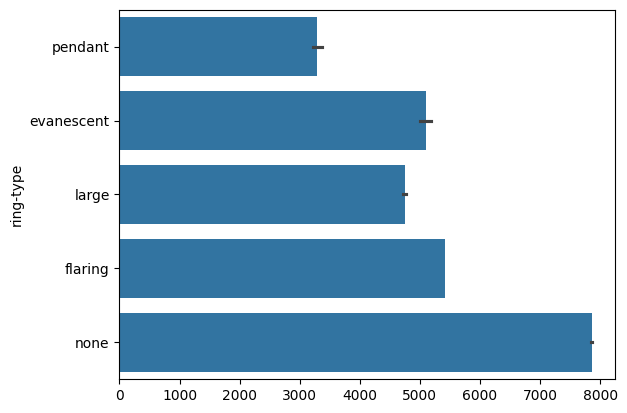

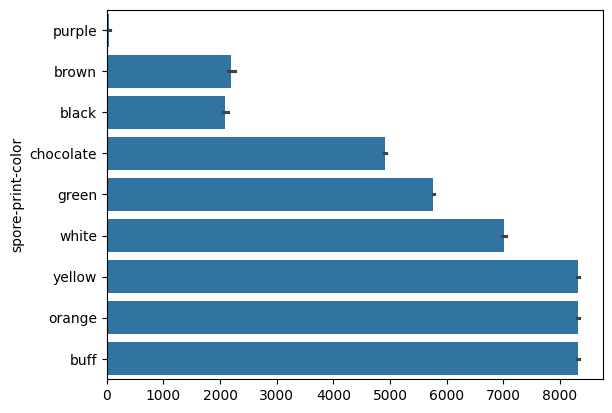

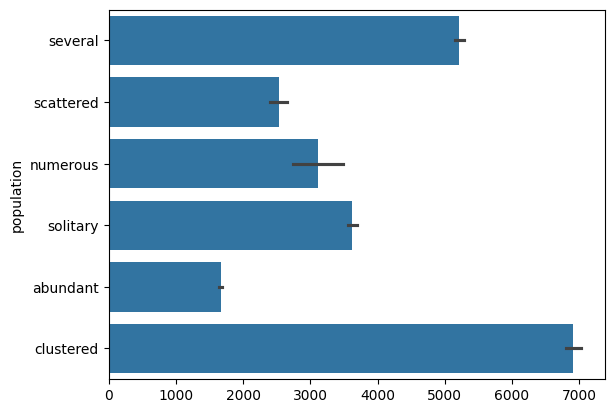

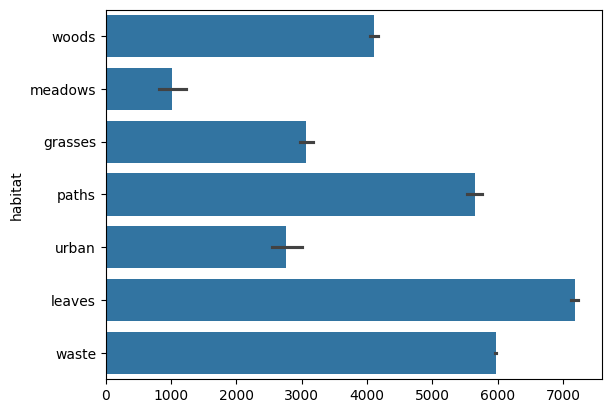

In [7]:
def make_bar(df, column):
    plt.figure()
    sns.barplot(data=df[column])

for column in df.columns:
    make_bar(df, column)

Sort of a let-down, really. These graphs are interesting to some extent, but they're both boring in what they look like as well as what they communicate. 

However, looking at these graphs, I thought that some columns might be more related to each other than others. For instance, some of the "odors" were really interesting, and some of them I inherently found both more or less appetizing. How do edibility and odor relate to each other? Sounds like a good job for a groupby. 

In [8]:
df_eating = df.groupby(['odor', 'edible']).count()
df_eating

cap-shape  cap-surface  cap-color  bruises%3F  \
odor     edible                                                     
almond   edible           400          400        400         400   
anise    edible           400          400        400         400   
creosote poisonous        192          192        192         192   
fishy    poisonous        576          576        576         576   
foul     poisonous       2160         2160       2160        2160   
musty    poisonous         48           48         48          48   
none     edible          3688         3688       3688        3688   
         poisonous        120          120        120         120   
pungent  poisonous        256          256        256         256   
spicy    poisonous        576          576        576         576   

                    gill-attachment  gill-spacing  gill-size  gill-color  \
odor     edible                                                            
almond   edible                 400           400        400         400   
anise    edible                 400           400        400         400   
creosote poisonous              192           192        192         192   
fishy    poisonous              576           576        576         576   
foul     poisonous             2160          2160       2160        2160   
musty    poisonous               48            48         48          48   
none     edible                3688          3688       3688        3688   
         poisonous              120           120        120         120   
pungent  poisonous              256           256        256         256   
spicy    poisonous              576           576        576         576   

                    stalk-shape  stalk-root  ...  stalk-surface-below-ring  \
odor     edible                              ...                             
almond   edible             400         400  ...                       400   
anise    edible             400         400  ...                       400   
creosote poisonous          192         192  ...                       192   
fishy    poisonous          576         576  ...                       576   
foul     poisonous         2160        2160  ...                      2160   
musty    poisonous           48          48  ...                        48   
none     edible            3688        3688  ...                      3688   
         poisonous          120         120  ...                       120   
pungent  poisonous          256         256  ...                       256   
spicy    poisonous          576         576  ...                       576   

                    stalk-color-above-ring  stalk-color-below-ring  veil-type  \
odor     edible                                                                 
almond   edible                        400                     400        400   
anise    edible                        400                     400        400   
creosote poisonous                     192                     192        192   
fishy    poisonous                     576                     576        576   
foul     poisonous                    2160                    2160       2160   
musty    poisonous                      48                      48         48   
none     edible                       3688                    3688       3688   
         poisonous                     120                     120        120   
pungent  poisonous                     256                     256        256   
spicy    poisonous                     576                     576        576   

                    veil-color  ring-number  ring-type  spore-print-color  \
odor     edible                                                             
almond   edible            400          400        400                400   
anise    edible            400          400        400                400   
creosote poisonous         192          192        192      

Facinating. I'm a little disappointed that "none" is the only category that has both edible and poisonous varieties. Howevever, I with these two categories, I wondered if I could make the colors and shapes of these odor categories resemble a mushroom. Seems like an opportunity for a stacked bar plot!

C:\Users\jct3368\AppData\Local\Temp\ipykernel_64568\972112403.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(abs(ax.get_yticks()))  # changes the yticks to absolute value


<Figure size 2000x2000 with 0 Axes>

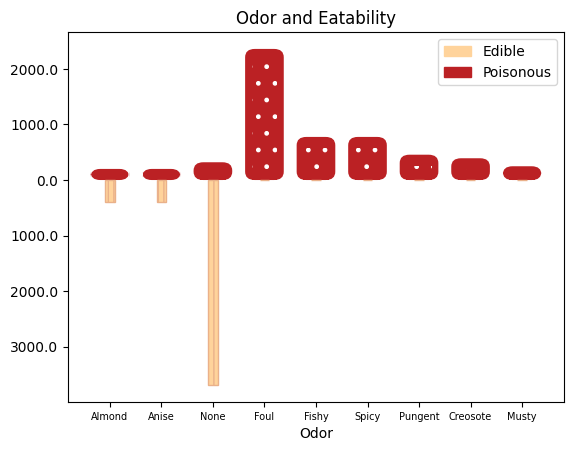

In [9]:
edible = [-400, -400, -3688, 0, 0, 0, 0, 0, 0]
poisonous = [0, 0, 120, 2160, 576, 576, 256, 192, 48]
r = [0, 8, 16, 24, 32, 40, 48, 56, 64]

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
names = ['Almond', 'Anise', 'None', 'Foul', 'Fishy', 'Spicy', 'Pungent', 'Creosote', 'Musty']
barWidth = 1.5

plt.bar(r, poisonous, bottom=100, color='#bb2124', 
        edgecolor='#ffffff', width=barWidth + 2.5, hatch='.') # Creates the bars to be patched

new_patches = []
for patch in reversed(ax.patches):  # Making patches 
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=1,rounding_size=1.5",
                        ec="none", fc=color,
                        mutation_aspect=100)
    patch.remove()
    new_patches.append(p_bbox)
for patch in new_patches:  # Applying patches to the first poisonous bars.
    ax.add_patch(patch)
    
plt.bar(r, poisonous, bottom=0, color='#bb2124', 
        edgecolor='#ffffff', width=barWidth + 2.5, linewidth=0, hatch='.')  # Creates new poisonous plots
ax.bar(r, edible, color='#ffd39b', edgecolor='#eab18a', 
       width=barWidth, hatch='|||')  # creates the stems

plt.xticks(r, names, size=7)
plt.xlabel("Odor")
ax.set_yticklabels(abs(ax.get_yticks()))  # changes the yticks to absolute value
plt.title("Odor and Eatability")
leg = ax.legend(['Edible', 'Poisonous'])
leg = ax.get_legend()
leg.legend_handles[0].set_color('#ffd39b')
leg.legend_handles[1].set_color('#bb2124')
plt.show()

Due to the round patch, each of these mushroom heads are padded by a minimum value bbox. for Almond and Anise, there are no poisonous varieties, but the head of the mushroom is created by the pad. The bottom of the pad is the true value, which is 0. I believe this graph is quite misleading, even if it is nice to look at.

# 2. The Colors of the Mushroom

In [7]:
def find_mode(df, category):
    df_category = df.groupby(category)[category].count()
    df_category = df_category.sort_values(ascending=False)
    df_category = pd.DataFrame(df_category)
    df_category['Percent'] = df_category/84.16
    return df_category
    

def make_modal_chart(df_color, color_column):
    rcParams['font.size'] = 9.0
    colors = {'brown': '#845321',
              'gray': '#808080', 
              'black': '#111110',
              'red': '#df5c52', 
              'yellow': '#f4eeb1',
              'chocolate': '#7B3F00',
              'orange': '#FFA500',
              'white': '#f6f6f6', 
              'buff': '#edd8b9', 
              'pink': '#ffc0cb', 
              'cinnamon': '#D2691E', 
              'green': '#6b8e23', 
              'purple': '#b59bb8'}
    labels = list(df_color.index.values) 
    explode = []
    explode_accumulator = 0
    for label in labels:
        explode_accumulator += 0.11
        explode.append(explode_accumulator)
    df_color.plot(kind='pie', 
                  y=color_column, 
                  autopct='%1.1f%%', 
                  pctdistance=1.2,
                  explode=explode,
                  figsize=(8, 8), 
                  labels=None,
                  colors=[colors[key] for key in labels],
                  wedgeprops= {"edgecolor":"black", 
                         'linewidth': 0.1, 
                         'antialiased': True})
    plt.title(f'{color_column}\n\n')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 0.6), labels=labels)

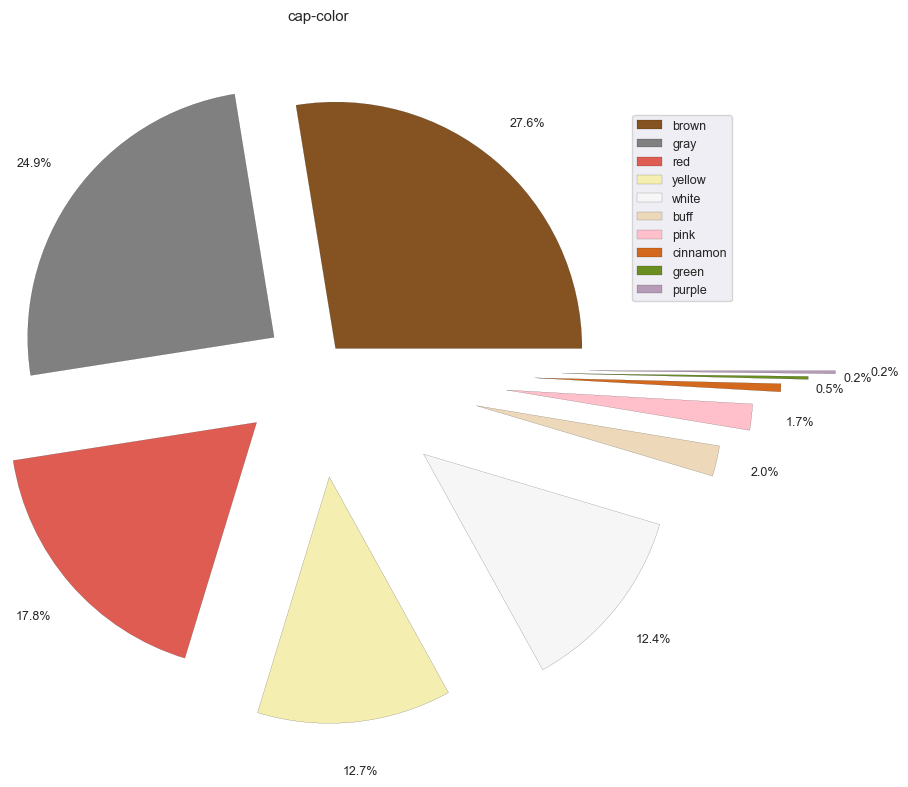

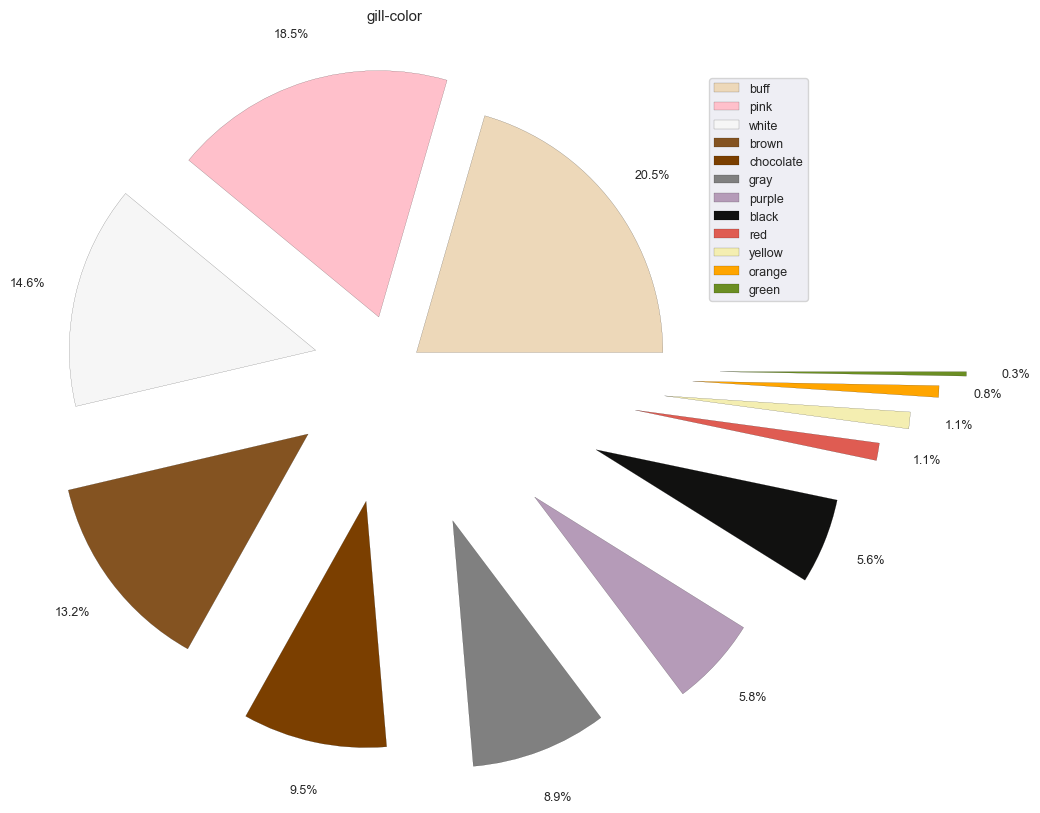

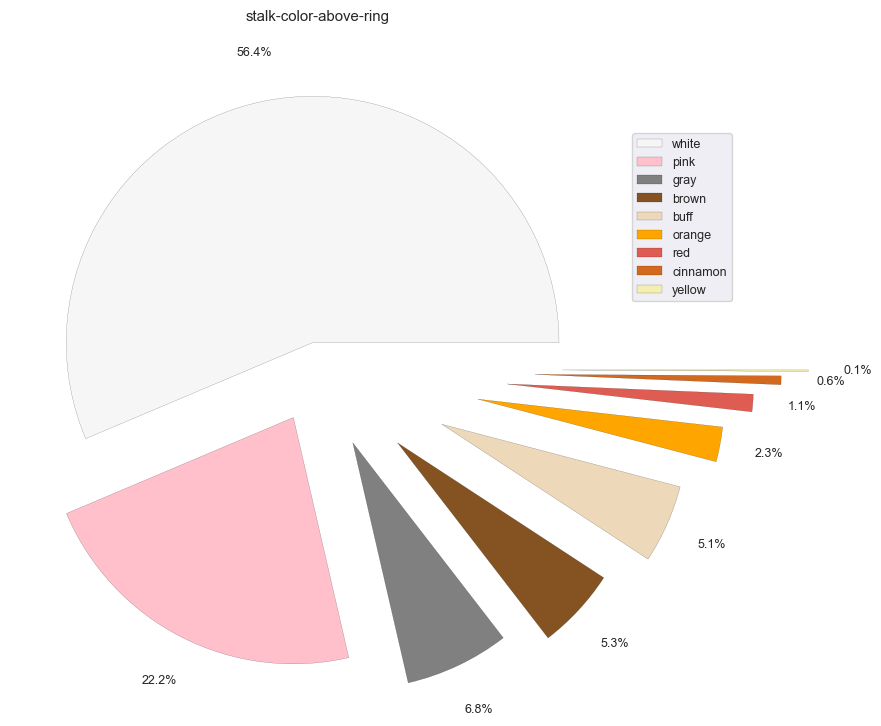

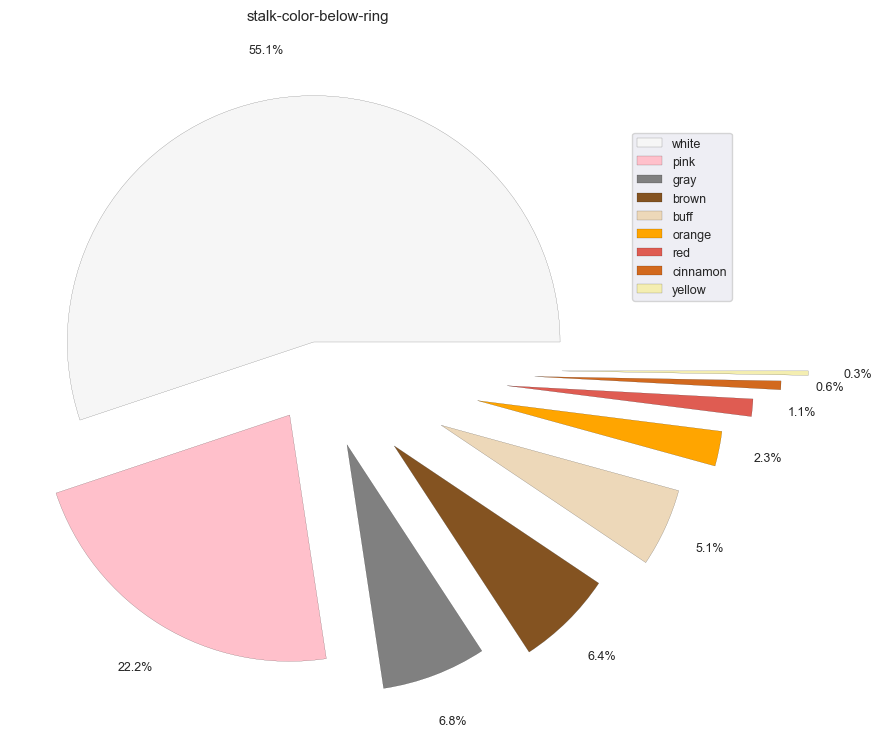

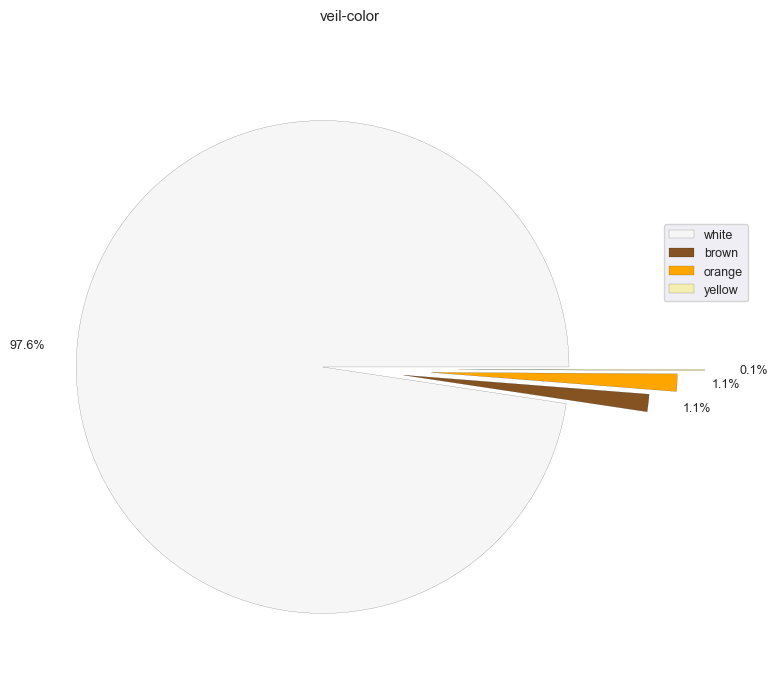

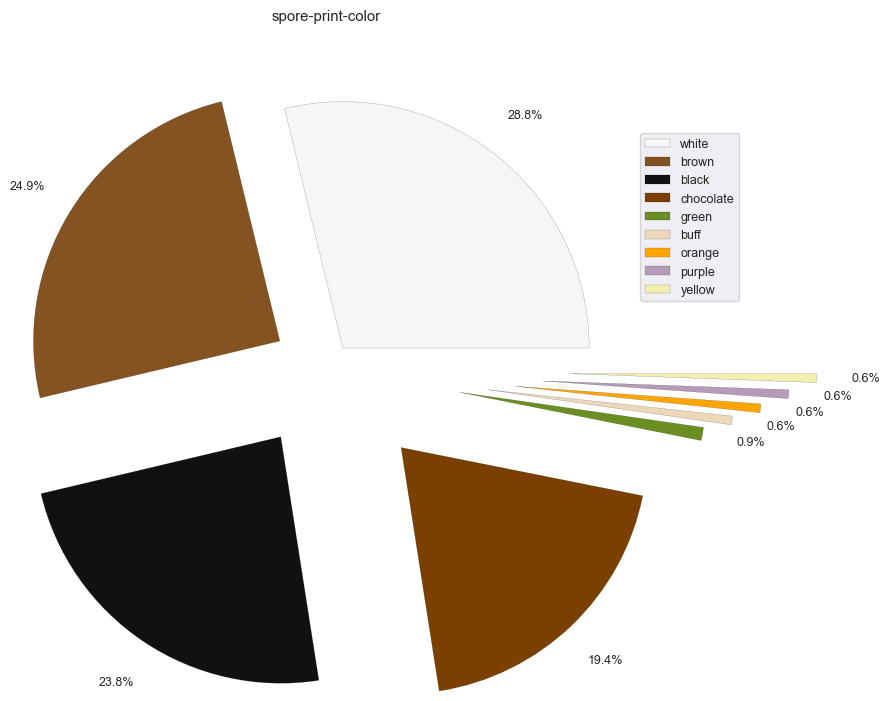

In [8]:
color_columns = ['cap-color',  # isolate the color columns
            'gill-color',
            'stalk-color-above-ring',
            'stalk-color-below-ring',
            'veil-color',
            'spore-print-color']

for color_column in color_columns:
    df_color = find_mode(df, color_column)
    make_modal_chart(df_color, color_column)

I think these are fun. It was tricky to get the colors to read from a dict. At first, I went with the stock colors for things like "red", "green", and "purple", and goodness that was hideous. I think adjusting to some better colors both makes these graphs work better, as well as representing colors that may actually appear in mushrooms. If you find a mushroom that looks like #FF0000, you'd... better start running. 

It also took a hot second for me to figure out the acumulator trick to create an "explode" list for legends of different lengths that would progressively separate out the labels in a way that kept them readable.

At first, matplotlib wanted the percentage to sit inside of each pie slice, and the label outside of the plot. This both made the plots looked clutter, as well as decreased readability. I thought it was sort of redundant to have a colored pie slice, as well as a label of that color. I decided to do away with the lable on the pie slice and move the percentage to the outside instead, and put the slices in a legend. 

I also wondered if there was a better way of representing this data as well. Given the common criticisms against the pie chart, I decided to see if a treemap would be better.

In [12]:
def find_mode(df, category):
    df_category = df.groupby(category)[category].count()
    df_category = df_category.sort_values(ascending=False)
    df_category = pd.DataFrame(df_category)
    df_category['Percent'] = df_category/84.16
    return df_category
    
def make_treemap(df_color, color_column):
#     fig, ax = plt.subplots(3, 2)
    colors = {'brown': '#845321',
          'gray': '#808080', 
          'black': '#111110',
          'red': '#df5c52', 
          'yellow': '#f4eeb1',
          'chocolate': '#7B3F00',
          'orange': '#FFA500',
          'white': '#f6f6f6', 
          'buff': '#edd8b9', 
          'pink': '#ffc0cb', 
          'cinnamon': '#D2691E', 
          'green': '#6b8e23', 
          'purple': '#b59bb8'}
    labels = list(df_color.index.values) 
    sns.set_style(style="whitegrid")
    sizes= df_color['Percent'].values
    label=df_color[color_column]
    fig = squarify.plot(sizes=sizes, label=label, alpha=0.7, 
                  color=[colors[key] for key in labels],
                  pad = 2).set(title=f'{color_column}\n\n')
    plt.legend(bbox_to_anchor=(1, 0.6), labels=labels)
    plt.axis('off')
    plt.show()

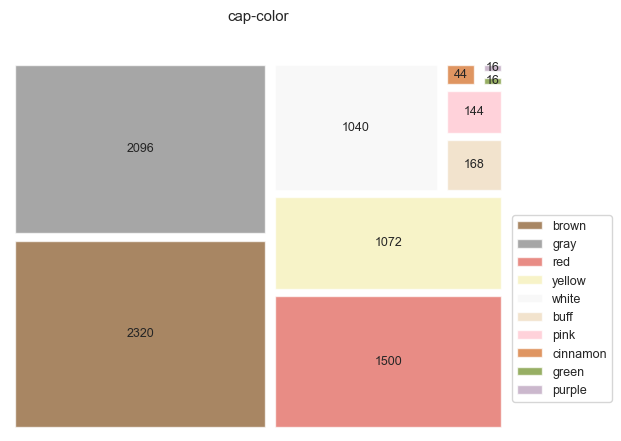

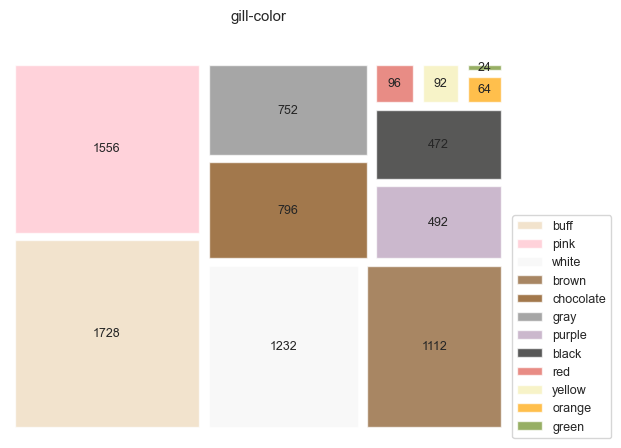

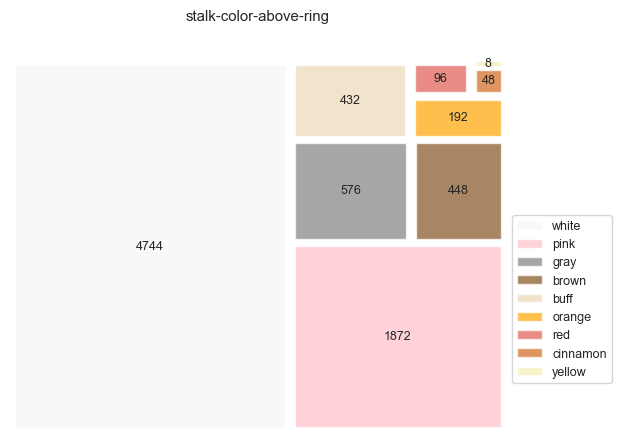

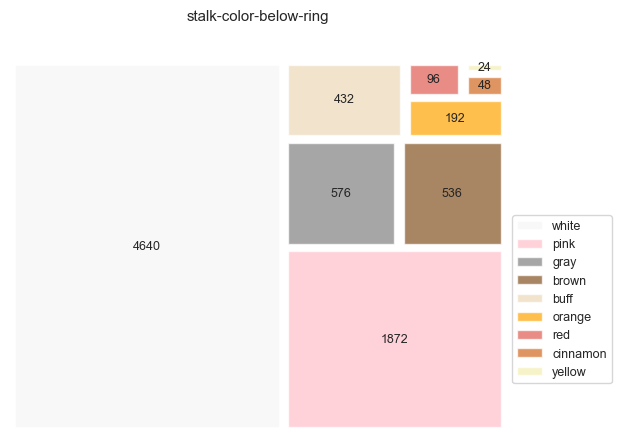

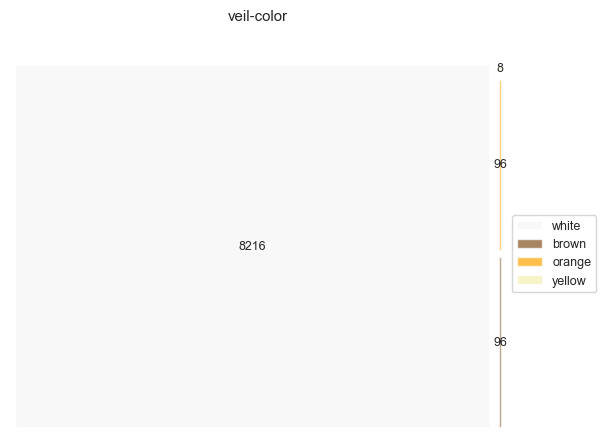

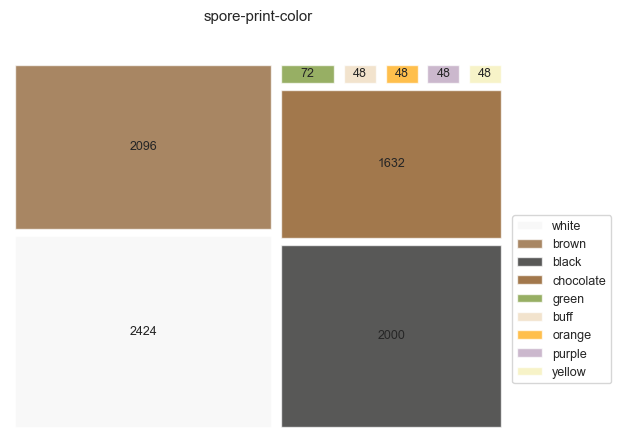

In [13]:
color_columns = ['cap-color',  # isolate the color columns
            'gill-color',
            'stalk-color-above-ring',
            'stalk-color-below-ring',
            'veil-color',
            'spore-print-color']

for color_column in color_columns:
    df_color = find_mode(df, color_column)
    make_treemap(df_color, color_column)

I personally find these more visually intuitive and appealing than the pie chart does, although I don't think it's that much easier to visually distinguish boxes that are almost the same size.

In [14]:
df_habitat = find_mode(df, 'habitat')
df_habitat

,habitat,Percent
habitat,,
woods,3160,37.547529
grasses,2404,28.564639
paths,1144,13.593156
leaves,856,10.171103
urban,368,4.372624
meadows,292,3.469582
waste,192,2.281369


Another column of the mushroom data is their growing habits, primarily habitat and population. I suppose population, in this sense, is more about how solitary they are, as opposed to numbers of those particular species. I decided to see if this would be a good fit for a waffle plot, which is often lauded as the better alternative to the pie chart. 

In [15]:
def make_waffles(df_habitat):
    plt.figure(
        FigureClass=Waffle,
        rows=10,
        columns=30,
        values=df_habitat['Percent'],
        labels=list(df_habitat.index),  # Legend would not be created without this line
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
    )
    plt.show()

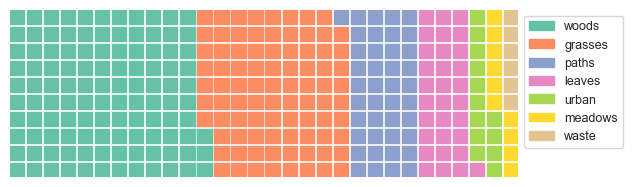

In [16]:
make_waffles(df_habitat)

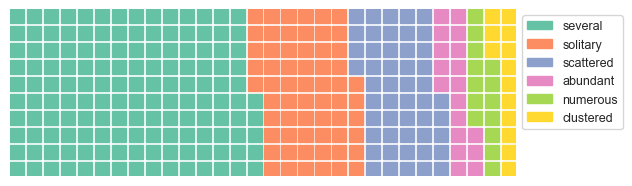

In [17]:
df_population = find_mode(df, 'population')
make_waffles(df_population)

These are definitely interesting. I particularly like "paths" and "urban" as habitats, since these are man-made. I wonder if there would be a way of representing either more detail in the habitats, or somehow incorporating both habitat and population information. 

Also, I concur that for things like this, a waffle plot is superior to the pie chart.